In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


Reading zomato.csv file

In [2]:
zm=pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
zm.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Data Cleaning:**

1.Deleting redundant columns.(i.e drop columns which not provide useful information )

In [3]:
zm.drop(columns=['url','address','phone','dish_liked','reviews_list','menu_item'],inplace=True)
zm.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


2.Renaming the columns.(rename the columns to make them more meaningful or descriptive)


In [4]:
new_column_names = {'name': 'Restaurant Name', 'online_order': 'Online Order', 'book_table': 'Table Booking',
                    'rate': 'Rating', 'votes': 'Number of Votes', 'location': 'Location', 'rest_type': 'Restaurant Type'}
zm.rename(columns=new_column_names, inplace=True)
zm.head(1)

,Restaurant Name,Online Order,Table Booking,Rating,Number of Votes,Location,Restaurant Type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


3.Dropping duplicates.(removing duplicates values in rows)

In [5]:
zm.shape

(51717, 11)

In [6]:
zm=zm.drop_duplicates()
zm.head(1)

,Restaurant Name,Online Order,Table Booking,Rating,Number of Votes,Location,Restaurant Type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


In [7]:
zm.shape

(51609, 11)

4.Remove the NaN values from the dataset(this function removes rows or columns that contain any NaN values)

checking no. of null values in each column

In [8]:
zm.isnull().sum()

Restaurant Name                   0
Online Order                      0
Table Booking                     0
Rating                         7755
Number of Votes                   0
Location                         21
Restaurant Type                 227
cuisines                         45
approx_cost(for two people)     344
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

5.deleting or droping those null values

In [9]:
zm=zm.dropna()


In [10]:
zm.isnull().sum()

Restaurant Name                0
Online Order                   0
Table Booking                  0
Rating                         0
Number of Votes                0
Location                       0
Restaurant Type                0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

**6.Cleaning the individual columns(one by one)**

In [11]:
zm['Restaurant Name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'The Nest - The Den Bengaluru', 'Nawabs Empire',
       'SeeYa Restaurant'], dtype=object)

This syntax is used for to check if column contains any unexpected characters

In [12]:
k = zm[zm['Restaurant Name'].str.contains(r'[^\w\d\s\']+')]
k.head()

,Restaurant Name,Online Order,Table Booking,Rating,Number of Votes,Location,Restaurant Type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1/5,402,Banashankari,Cafe,Cafe,500,Cafes,Banashankari
13,Caf-Eleven,No,No,4.0/5,424,Banashankari,Cafe,"Cafe, Continental",450,Cafes,Banashankari
16,Catch-up-ino,Yes,No,3.9/5,133,Banashankari,Cafe,"Cafe, Fast Food, Continental, Chinese, Momos",800,Cafes,Banashankari
103,Floured-Baked With Love,No,No,3.8 /5,45,Banashankari,"Takeaway, Delivery",Bakery,400,Delivery,Banashankari


Here as we can see 'CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley' has some special characters in it, which needed to be removed.
which can be done with the help of regex

In [13]:
zm['Restaurant Name']= zm['Restaurant Name'].replace("[Ã|Â][^\d]",'',regex=True)
zm['Restaurant Name']= zm['Restaurant Name'].replace("?","'")
zm['Restaurant Name']= zm['Restaurant Name'].replace("@",' at ')


In [14]:
k = zm[zm['Restaurant Name'].str.contains(r'[^\w\d\s\']+')]
k.head()

,Restaurant Name,Online Order,Table Booking,Rating,Number of Votes,Location,Restaurant Type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
13,Caf-Eleven,No,No,4.0/5,424,Banashankari,Cafe,"Cafe, Continental",450,Cafes,Banashankari
16,Catch-up-ino,Yes,No,3.9/5,133,Banashankari,Cafe,"Cafe, Fast Food, Continental, Chinese, Momos",800,Cafes,Banashankari
103,Floured-Baked With Love,No,No,3.8 /5,45,Banashankari,"Takeaway, Delivery",Bakery,400,Delivery,Banashankari
105,Cakes & Slices,No,No,3.5/5,13,Banashankari,Bakery,"Bakery, Desserts",300,Delivery,Banashankari


In [15]:
zm['Online Order'].unique()



array(['Yes', 'No'], dtype=object)

In [16]:
zm['Table Booking'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
zm['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

This column contains uncertain value in it

In [18]:
zm['Rating']=zm['Rating'].str.replace("NEW","0")
zm['Rating']=zm['Rating'].str.replace("-","0")
zm['Rating']=zm['Rating'].str.replace("/5","")
zm['Rating']=zm['Rating'].astype('float')

In [19]:
zm['Rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [20]:
zm['Number of Votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843])

In [21]:
zm['Location'].unique()


array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [22]:
zm['Restaurant Type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [23]:
zm['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [24]:
zm['approx_cost(for two people)'].unique()
zm['approx_cost(for two people)']=zm['approx_cost(for two people)'].str.replace(",","")

In [25]:
zm['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [26]:
zm['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [27]:
zm['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [28]:
zm.isnull().sum()

Restaurant Name                0
Online Order                   0
Table Booking                  0
Rating                         0
Number of Votes                0
Location                       0
Restaurant Type                0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

**Data Visualization:**

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [30]:
zm.head(1)

,Restaurant Name,Online Order,Table Booking,Rating,Number of Votes,Location,Restaurant Type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


1.Restaurants delivering Online or not(Number of restaurants delivering food online)

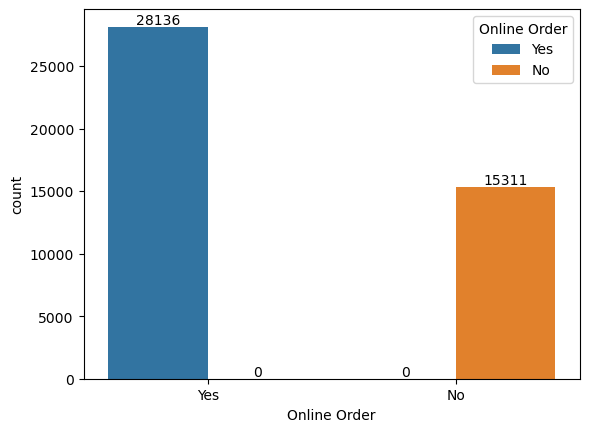

In [31]:
a=sns.countplot(x='Online Order',data=zm,hue='Online Order')
for i in a.containers:
    a.bar_label(i)
plt.show()

2.Restaurants allowing table booking or not (No. of restaurants where pre-booking of table can be done)

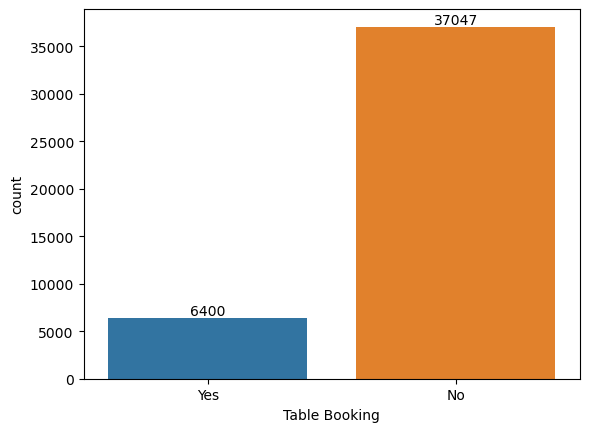

In [32]:
a=sns.countplot(x='Table Booking',data=zm)
for i in a.containers:
    a.bar_label(i)
plt.show()

3.Table booking Rate vs Rate(What is the effect on the rating when pre-booking of a table is done? )

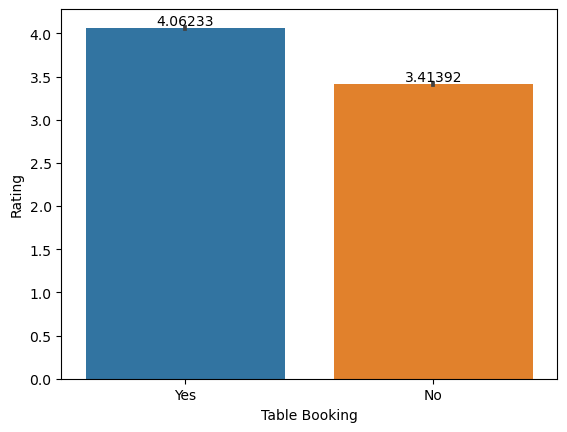

In [33]:
a=sns.barplot(x='Table Booking',y='Rating',data=zm)
for i in a.containers:
    a.bar_label(i)
plt.show()

4.Best Location(Top 5 locations with highest rating n votes)

<Figure size 640x480 with 0 Axes>

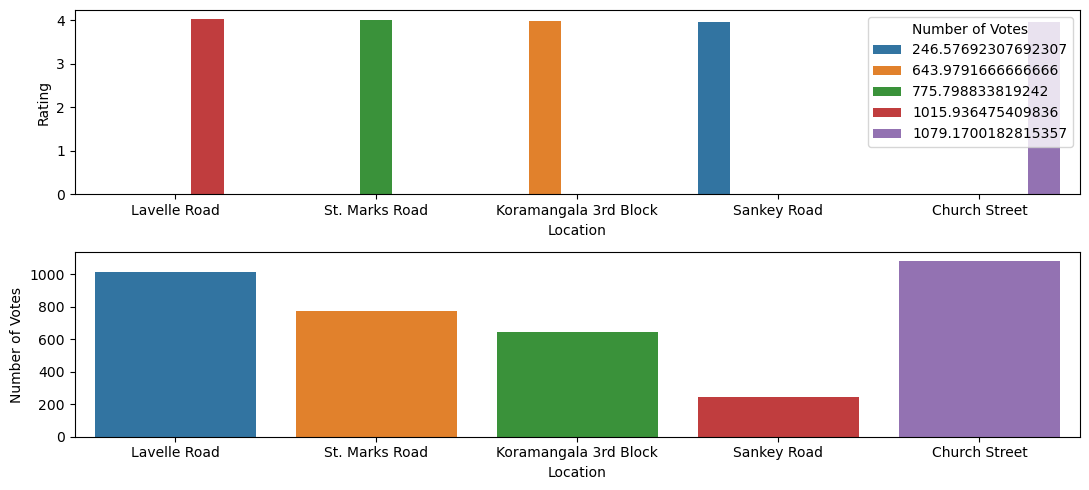

In [34]:
fig=plt.figure()
fig, axes=plt.subplots(nrows=2, ncols=1,figsize=(11,5))

a=zm.groupby('Location')[['Rating','Number of Votes']].mean().nlargest(5,['Rating','Number of Votes']).reset_index()
sns.barplot(x='Location',y='Rating',data=a,ax=axes[0],hue='Number of Votes')
sns.barplot(x='Location',y='Number of Votes',data=a,ax=axes[1])
fig.tight_layout()

Restaurant Type(No of restaurants and their corresponding counts to determine which restaurant type has the highest number)

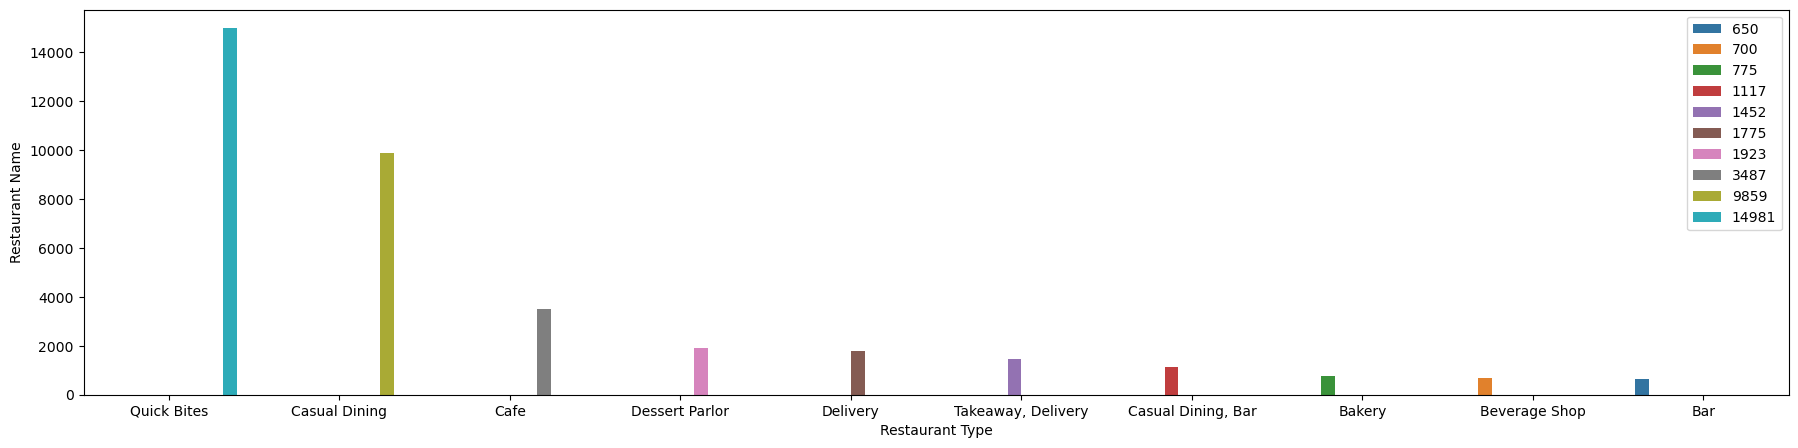

In [35]:
plt.figure(figsize=(22,5))
type=zm.groupby('Restaurant Type')[['Restaurant Name']].count().nlargest(10,['Restaurant Name']).reset_index()
sns.barplot(x='Restaurant Type',y='Restaurant Name',hue='Restaurant Name',data=type)
plt.legend(loc ="upper right")

Gaussian Rest type and Rating

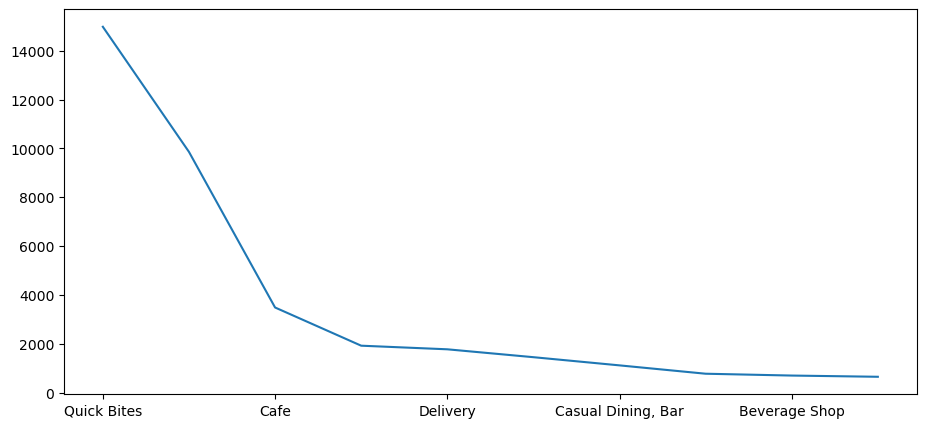

In [36]:
plt.figure(figsize=(11,5))
gauss=zm['Restaurant Type'].value_counts().nlargest(10).plot(kind='line')


<Axes: xlabel='Rating', ylabel='Density'>

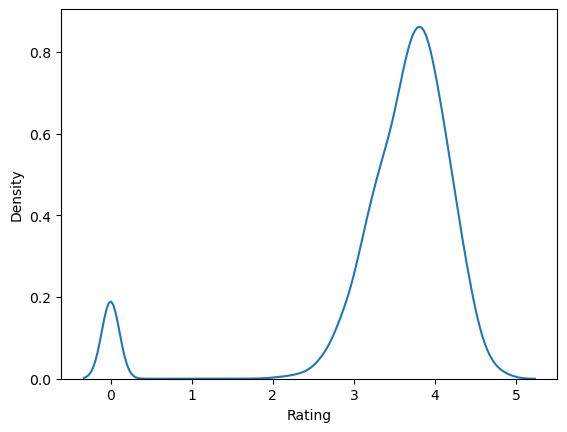

In [37]:
# gauss=gauss['Rating'].value_counts().nlargest(10).plot(kind='line')
sns.kdeplot(data=zm,x='Rating')

Types of Services

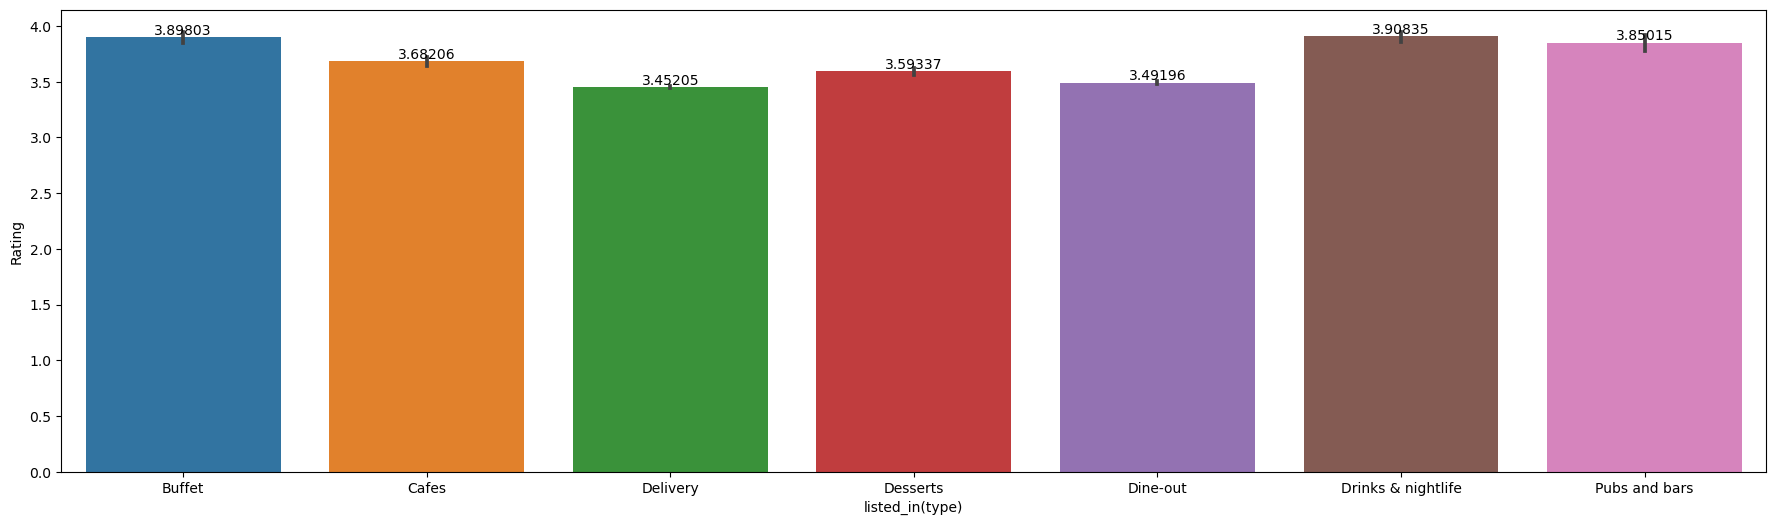

In [38]:
plt.figure(figsize=(22,6))
a=sns.barplot(x='listed_in(type)',y='Rating',data=zm)

for i in a.containers:
    a.bar_label(i)
plt.show()

Relation between Type and Rating

<Axes: xlabel='listed_in(type)', ylabel='Rating'>

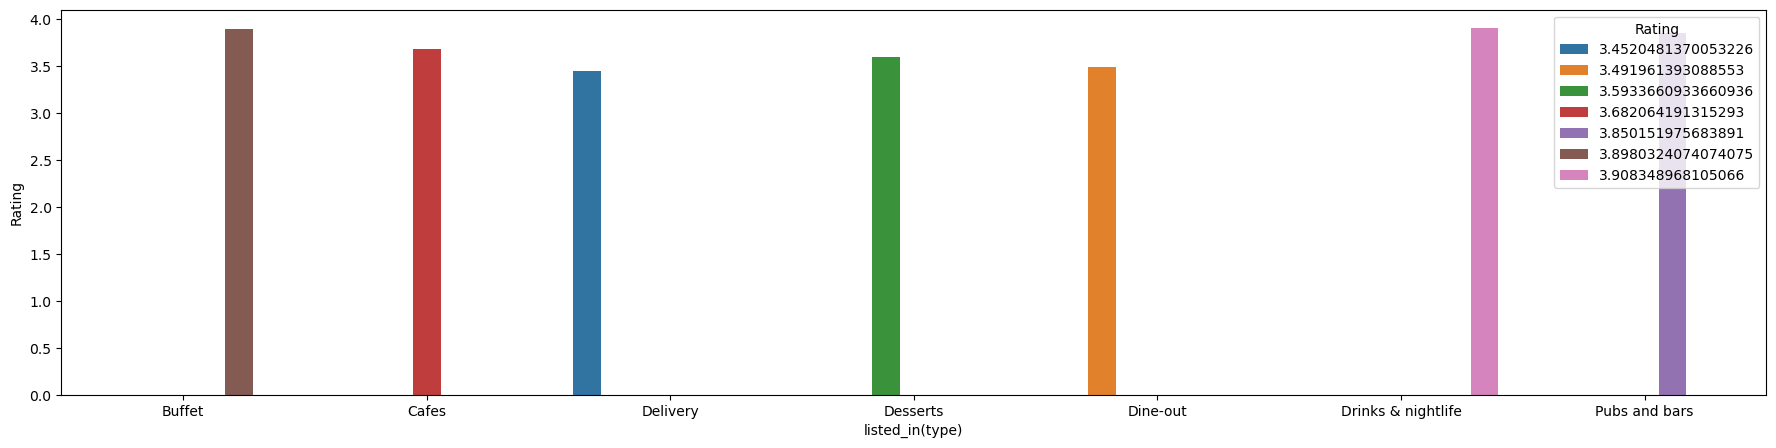

In [39]:
fig=plt.figure(figsize=(22,5))
ty=zm.groupby(['listed_in(type)'])[['Rating']].mean().reset_index()
sns.barplot(x='listed_in(type)',y='Rating',data=ty,hue='Rating')

Cost of Restaurant(To determine the minimum cost required for two people to eat at a particular restaurant)

check the data types of the columns on which we are going to work

In [40]:
zm[['Restaurant Name','approx_cost(for two people)']].dtypes

Restaurant Name                object
approx_cost(for two people)    object
dtype: object

since mean() cant work properly on object data type convert it into float 

In [41]:
zm['approx_cost(for two people)']=zm['approx_cost(for two people)'].astype(float)

<Axes: xlabel='Restaurant Name', ylabel='approx_cost(for two people)'>

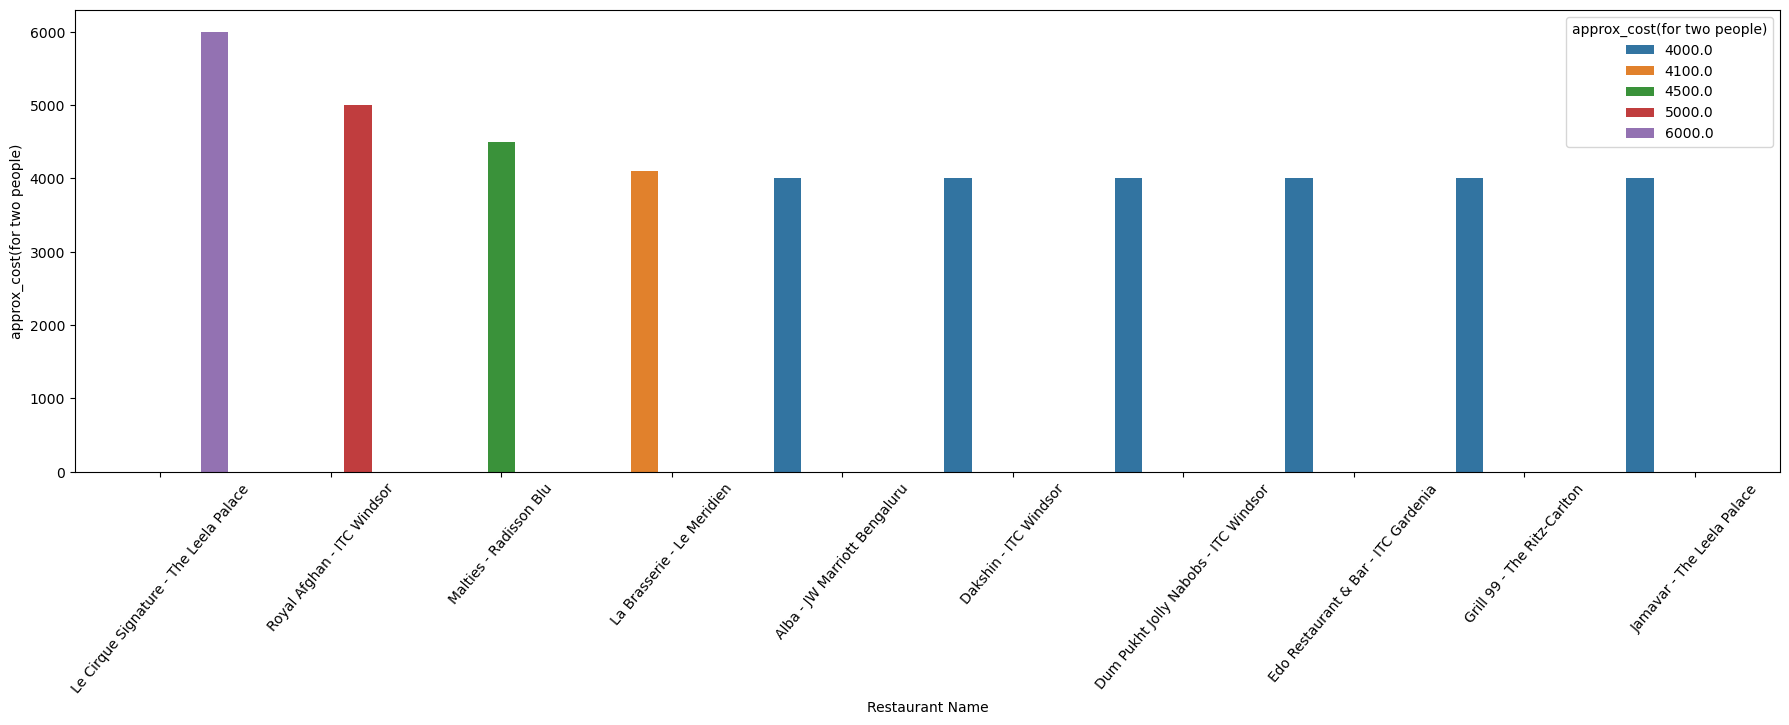

In [42]:
plt.figure(figsize=(22,6))
plt.xticks(rotation=50)
resto=zm.groupby('Restaurant Name')[['approx_cost(for two people)']].mean().nlargest(10,['approx_cost(for two people)']).reset_index()
sns.barplot(x='Restaurant Name',y='approx_cost(for two people)',data=resto,hue='approx_cost(for two people)')


No. of restaurants in a Location(Total No. of restaurants in a particular location)

<Axes: xlabel='listed_in(city)', ylabel='Restaurant Name'>

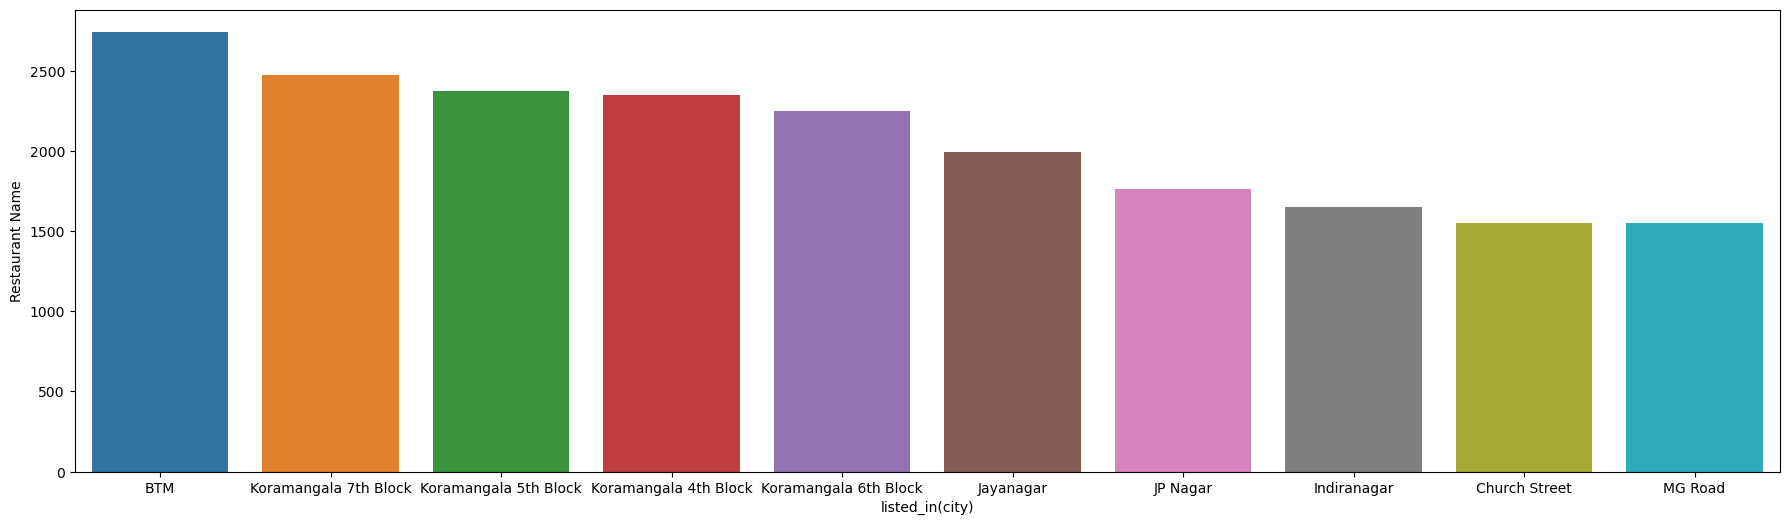

In [43]:
plt.figure(figsize=(22,6))
no=zm.groupby('listed_in(city)')[['Restaurant Name']].count().nlargest(10,['Restaurant Name']).reset_index()
sns.barplot(x='listed_in(city)',y='Restaurant Name',data=no) 

Restaurant type

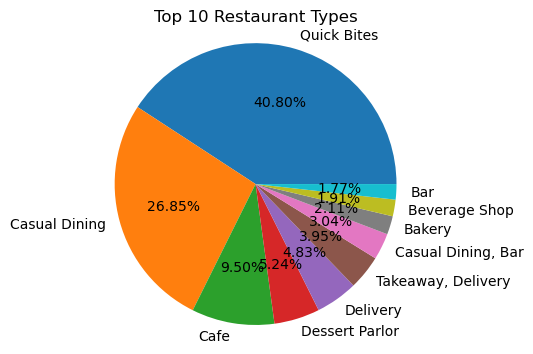

In [44]:
# plt.figure(figsize=(22,5))
# typ=zm.groupby('Restaurant Type')[['Restaurant Name']].count().nlargest(10,['Restaurant Name']).reset_index()
# sns.barplot(x='Restaurant Type',y='Restaurant Name',data=typ)


plt.figure(figsize=(4, 4))  
typ = zm.groupby('Restaurant Type')['Restaurant Name'].count().nlargest(10).reset_index()

plt.pie(typ['Restaurant Name'], labels=typ['Restaurant Type'],autopct='%1.2f%%')
plt.axis('equal')  
plt.title('Top 10 Restaurant Types')  
plt.show()


Most famous restaurant chains in Bengaluru(To find which restaurants are the most famous according to their ratings in Bengaluru.)

<Axes: xlabel='Restaurant Name', ylabel='Rating'>

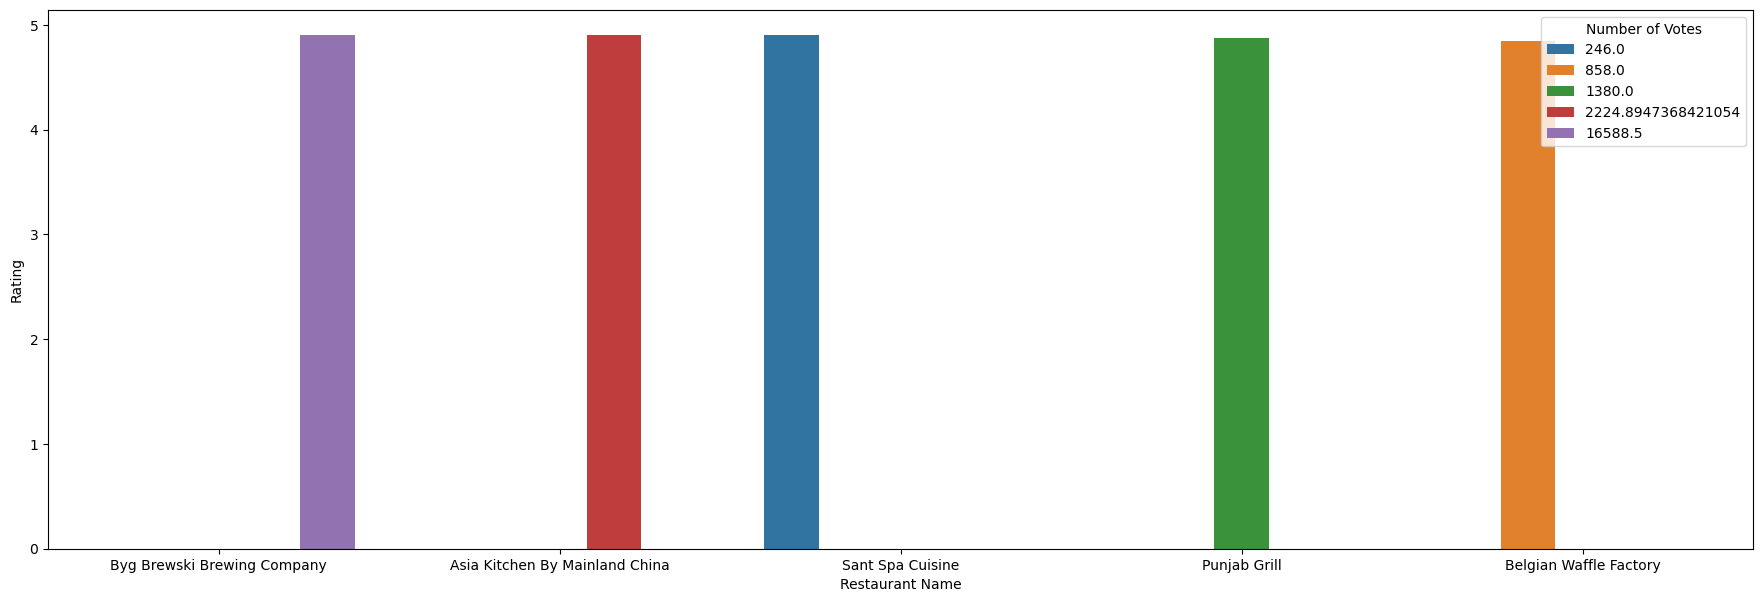

In [45]:
plt.figure(figsize=(22,7))
zm[zm['Location']=='Bengaluru']
a=zm.groupby('Restaurant Name')[['Rating','Number of Votes']].mean().nlargest(5,['Rating','Number of Votes']).reset_index()
a
sns.barplot(data=a,x='Restaurant Name',y='Rating',hue='Number of Votes')

**Conclusion**